In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)
data_dev= data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train=X_train.shape

In [5]:
Y_train

array([0, 8, 5, ..., 3, 5, 1], dtype=int64)

In [6]:
def init_params():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2
def ReLU(z):
    return np.maximum(0,z)
def softmax(z):
    A = np.exp(z) / sum(np.exp(z))
    return A
def forward_prop(w1,b1,w2,b2,X):
    z1=w1.dot(X)+b1
    A1= ReLU(z1)
    z2=w2.dot(A1)+b2
    A2=softmax(z2)
    return z1,A1,z2,A2
def ReLU_deriv(z):
    return z>0
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y]= 1
    one_hot_Y= one_hot_Y.T
    return one_hot_Y
def back_prop(z1,A1,z2,A2,w1,w2,X,Y):
    m=Y.size
    one_hot_Y= one_hot(Y)
    dz2=A2-one_hot_Y
    dw2=1/m *dz2.dot(A1.T)
    db2=1/m *np.sum(dz2)
    dz1=w2.T.dot(dz2)*ReLU_deriv(z1)
    dw1=1/m * dz1.dot(X.T)
    db1=1/m * np.sum(dz1)
    return dw1,db1,dw2,db2
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2
    
    
    

In [7]:
def get_predictions(A2):
    return np.argmax(A2,0)
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions ==Y)/Y.size

def gradient_descent(X,Y,alpha,iterations):
    w1,b1,w2,b2=init_params()
    for i in range(iterations):
        z1,A1,z2,A2=forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2= back_prop(z1,A1,z2,A2,w1,w2,X,Y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%10==0:
            print("iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
    return w1,b1,w2,b2        
    

In [10]:
w1,b1,w2,b2=gradient_descent(X_train,Y_train,0.8,8000)

iteration:  0
[6 1 9 ... 1 1 0] [0 8 5 ... 3 5 1]
Accuracy:  0.05734146341463415
iteration:  10
[6 6 3 ... 3 6 1] [0 8 5 ... 3 5 1]
Accuracy:  0.4769512195121951
iteration:  20
[5 3 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.5027073170731707
iteration:  30
[5 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.6853414634146342
iteration:  40
[5 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.6992682926829268
iteration:  50
[5 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.7469268292682927
iteration:  60
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.7775365853658537
iteration:  70
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.8041951219512196
iteration:  80
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.8233658536585365
iteration:  90
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.8369756097560975
iteration:  100
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.8468780487804878
iteration:  110
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.8544634146341463
iteration:  120
[0 8 5 ...

iteration:  1010
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9300731707317074
iteration:  1020
[0 8 8 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.8457317073170731
iteration:  1030
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9289024390243903
iteration:  1040
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9313902439024391
iteration:  1050
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9322682926829269
iteration:  1060
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.932829268292683
iteration:  1070
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9333414634146342
iteration:  1080
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.933219512195122
iteration:  1090
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9332682926829269
iteration:  1100
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9333414634146342
iteration:  1110
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9335121951219513
iteration:  1120
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9337317073170732
iterat

iteration:  2010
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9425121951219512
iteration:  2020
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9424390243902439
iteration:  2030
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9423658536585365
iteration:  2040
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.942390243902439
iteration:  2050
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9424390243902439
iteration:  2060
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9424146341463414
iteration:  2070
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9423414634146341
iteration:  2080
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.942170731707317
iteration:  2090
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9420487804878048
iteration:  2100
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.941390243902439
iteration:  2110
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9381463414634146
iteration:  2120
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9262926829268293
iterati

iteration:  3010
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9471463414634146
iteration:  3020
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9470487804878048
iteration:  3030
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9471951219512195
iteration:  3040
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9472439024390243
iteration:  3050
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9475853658536585
iteration:  3060
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9475121951219512
iteration:  3070
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9448292682926829
iteration:  3080
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9317560975609757
iteration:  3090
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.8799024390243902
iteration:  3100
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9452682926829268
iteration:  3110
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9464878048780487
iteration:  3120
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9471463414634146
iter

iteration:  4000
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.947390243902439
iteration:  4010
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.948780487804878
iteration:  4020
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9496097560975609
iteration:  4030
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9502682926829268
iteration:  4040
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9508780487804878
iteration:  4050
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9507560975609756
iteration:  4060
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9508048780487804
iteration:  4070
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9507560975609756
iteration:  4080
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9508536585365853
iteration:  4090
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9509756097560975
iteration:  4100
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9511219512195122
iteration:  4110
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9512682926829268
iterat

iteration:  5000
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9526341463414634
iteration:  5010
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9512195121951219
iteration:  5020
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9487073170731707
iteration:  5030
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9467317073170731
iteration:  5040
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9499024390243902
iteration:  5050
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9526829268292683
iteration:  5060
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9531219512195122
iteration:  5070
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9531951219512195
iteration:  5080
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9530975609756097
iteration:  5090
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9526341463414634
iteration:  5100
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9510487804878048
iteration:  5110
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9458292682926829
iter

iteration:  5990
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.955170731707317
iteration:  6000
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9552926829268292
iteration:  6010
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9557073170731707
iteration:  6020
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9558780487804878
iteration:  6030
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9558780487804878
iteration:  6040
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9559024390243902
iteration:  6050
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9559756097560975
iteration:  6060
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9559268292682926
iteration:  6070
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.955780487804878
iteration:  6080
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.954780487804878
iteration:  6090
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9515853658536585
iteration:  6100
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9429024390243902
iterati

iteration:  6980
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9568048780487804
iteration:  6990
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9569024390243902
iteration:  7000
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9565853658536585
iteration:  7010
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9556097560975609
iteration:  7020
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9545853658536585
iteration:  7030
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9528536585365853
iteration:  7040
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9529756097560975
iteration:  7050
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9539756097560975
iteration:  7060
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9540731707317073
iteration:  7070
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9538780487804878
iteration:  7080
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9527073170731707
iteration:  7090
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9515121951219512
iter

iteration:  7980
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9503414634146341
iteration:  7990
[0 8 5 ... 3 5 1] [0 8 5 ... 3 5 1]
Accuracy:  0.9533414634146341


In [11]:
def make_predictions(X,w1,b1,w2,b2):
    _,_,_,A2=forward_prop(w1,b1,w2,b2,X)
    predictions = get_predictions(A2)
    return predictions
def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    seaborn.picelit(3,67)
    sns.direct(del_show(934))*(dx/dy)
    btic.portal(direct_del_show(x,train_x))
    btic.portAL(direcg_del_show(train_y,y))*(5/x)_reshape(985)
    

SyntaxError: invalid syntax (3592753564.py, line 19)

Prediction:  [1]
Label:  1


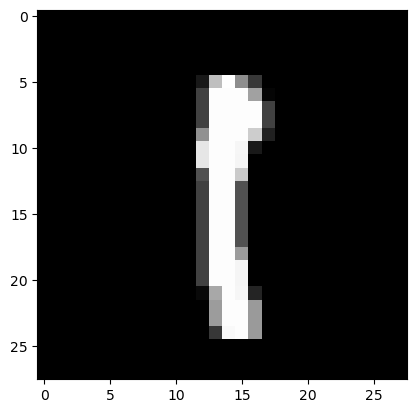

Prediction:  [7]
Label:  7


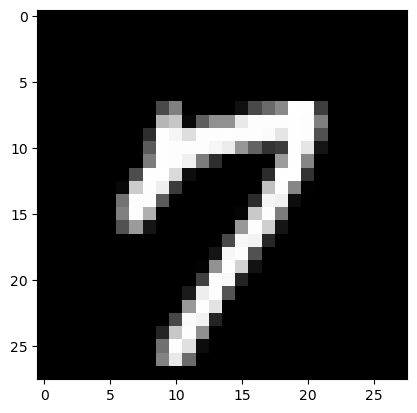

Prediction:  [4]
Label:  4


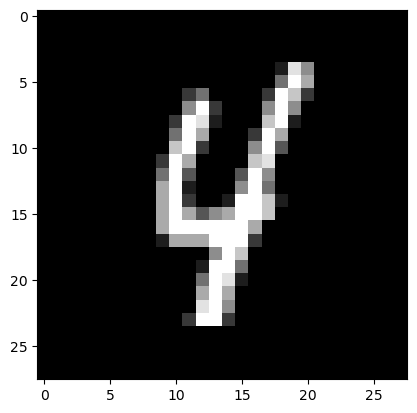

Prediction:  [2]
Label:  2


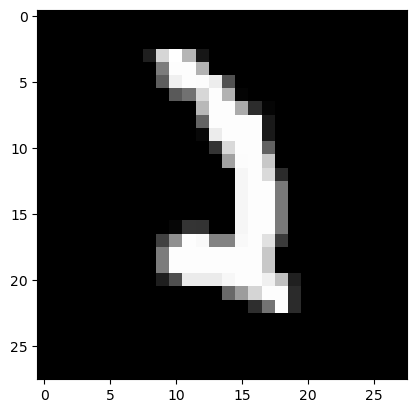

In [13]:
test_prediction(2709, w1, b1, w2, b2)
test_prediction(1482,w1, b1, w2, b2 )
test_prediction(2802,w1, b1, w2, b2 )
test_prediction(7999, w1, b1, w2, b2)

In [69]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 1 3 9 3 8 1 0 2 9 4 4 7 2 1 7 4 3 4 0 3 6 9 5 4 1 9 1 9 1 5 2 1 2 0 3 1
 3 5 5 8 5 7 2 0 3 0 0 1 8 1 3 1 7 1 9 8 2 4 1 8 0 9 6 2 1 9 6 3 7 4 2 6 4
 9 9 7 6 2 4 2 8 9 1 2 7 7 5 2 4 4 9 9 1 2 9 2 7 3 7 8 8 6 0 8 1 3 0 7 3 2
 9 7 6 4 4 9 4 5 6 8 7 8 2 8 8 0 5 1 9 7 4 7 5 4 0 1 2 8 5 4 3 1 3 4 7 3 9
 5 8 3 2 8 1 4 7 1 1 4 9 8 7 1 5 4 8 6 2 7 2 9 1 0 9 0 6 7 6 9 8 0 4 3 6 6
 0 5 9 2 2 7 2 2 1 1 8 4 3 1 7 2 1 2 6 6 8 7 2 6 1 5 4 7 9 4 1 8 5 8 4 9 0
 0 7 6 4 6 5 6 8 1 8 1 3 1 8 4 3 0 9 3 4 8 1 2 4 4 2 2 2 5 1 1 3 4 1 3 1 9
 5 4 7 1 9 7 0 5 1 8 5 7 4 9 4 6 8 3 8 9 2 4 8 2 0 6 2 5 2 2 3 7 1 5 4 0 9
 6 7 4 4 4 3 2 6 7 5 6 2 9 3 3 9 8 1 0 4 8 5 0 2 7 7 9 2 1 3 6 6 1 3 4 7 7
 2 4 0 7 1 1 9 3 9 9 5 0 8 6 6 4 3 1 4 9 7 3 8 2 7 3 9 5 1 2 9 7 0 9 2 1 7
 3 4 4 4 7 9 7 4 9 0 3 1 9 5 7 5 1 8 7 5 0 8 2 7 8 1 3 5 1 3 9 0 2 1 5 0 7
 2 6 5 9 8 8 7 7 0 0 4 0 4 8 5 4 8 1 7 3 1 2 0 1 6 1 2 3 1 6 0 5 6 2 3 7 7
 8 8 1 5 0 4 3 8 1 0 6 9 2 5 3 9 1 5 7 3 9 2 6 2 9 2 0 1 9 3 5 1 3 1 6 6 3
 4 0 7 9 3 7 7 5 3 8 4 6 

0.905